# Word2Vec on Wikipedia article

**Objective**:
  * Use wikipedia for the source of data
  * Do data cleaning and feed to Word2Vec model
  * Using Word2Vec, find out the most_similar() and similarity() words.

In [2]:
# pip install wikipedia
import wikipedia

In [3]:
wikipedia.__version__

(1, 4, 0)

## Let's explore Wikipedia APIs

 * [Wiki API Doc](https://wikipedia.readthedocs.io/en/latest/code.html)
 * [pip install](https://pypi.org/project/wikipedia/)

In [4]:
wikipedia.summary('Artificial Intelligence', sentences=1)

u'Artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, in contrast to the natural intelligence displayed by humans and other animals.'

In [5]:
wikipedia.summary('Natural Language Processing', sentences=2)

u'Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.\nChallenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.'

In [6]:
#wikipedia.suggest('dolla')

### Do Wiki Search

In [7]:
result = wikipedia.search('Deep Learning')

In [8]:
len(result)

10

In [9]:
result[0]

u'Deep learning'

In [10]:
result

[u'Deep learning',
 u'Comparison of deep learning software',
 u'Artificial neural network',
 u'Deeper learning',
 u'Machine learning',
 u'Q-learning',
 u'Google Brain',
 u'Nervana Systems',
 u'DeepMind',
 u'List of datasets for machine learning research']

### Get Wiki Page

In [11]:
page = wikipedia.page(result[0])

In [12]:
# get page content
#page.content

In [13]:
wikipedia.summary(result[0])

u'Deep learning (also known as deep structured learning or hierarchical learning) is part of a broader family of machine learning methods based on learning data representations, as opposed to task-specific algorithms. Learning can be supervised, semi-supervised or unsupervised.Deep learning architectures such as deep neural networks, deep belief networks and recurrent neural networks have been applied to fields including computer vision, speech recognition, natural language processing, audio recognition, social network filtering, machine translation, bioinformatics, drug design and board game programs, where they have produced results comparable to and in some cases superior to human experts.\nDeep learning models are vaguely inspired by information processing and communication patterns in biological nervous systems yet have various differences from the structural and functional properties of biological brains (especially human brain), which make them incompatible with neuroscience evi

In [14]:
page.categories

[u'All articles needing expert attention',
 u'All articles that are too technical',
 u'All articles to be split',
 u'All articles with unsourced statements',
 u'Articles needing expert attention from July 2016',
 u'Articles prone to spam from June 2015',
 u'Articles to be split from June 2018',
 u'Articles with unsourced statements from April 2018',
 u'Articles with unsourced statements from July 2016',
 u'Articles with unsourced statements from September 2017',
 u'Artificial neural networks',
 u'CS1 maint: BOT: original-url status unknown',
 u'Deep learning',
 u'Wikipedia articles needing clarification from September 2017',
 u'Wikipedia articles that are too technical from July 2016',
 u'Wikipedia semi-protected pages']

### Clean up wiki content

In [15]:
import nltk # sent_tokenize(), word_tokensize()

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [17]:
import string # for punctuation

In [18]:
# define the function to clean up wiki content

def pre_process(text):
    result = []  # bunch of tokens
    lemma = WordNetLemmatizer() # optimize the word list - like, likely etc.
    # go thru each sentence
    for sent in nltk.sent_tokenize(text):
        #print sent
        words = nltk.word_tokenize(sent.lower())
        # not a punctuation
        tokens = [word for word in words if word not in string.punctuation]
        # not a stop word
        tokens = [token for token in tokens if token not in stopwords.words('english')]
        # lemmatize
        tokens = [lemma.lemmatize(token) for token in tokens ]
        #print sent
        result += [tokens]
    return result
    


In [19]:
#page.content

In [20]:
word_list = pre_process(page.content)
print(word_list[0])

print(len(word_list))


[u'deep', u'learning', u'also', u'known', u'deep', u'structured', u'learning', u'hierarchical', u'learning', u'part', u'broader', u'family', u'machine', u'learning', u'method', u'based', u'learning', u'data', u'representation', u'opposed', u'task-specific', u'algorithm']
245


## Build model using  Word2Vec

In [21]:
from  gensim.models import Word2Vec

In [22]:
#?Word2Vec

In [23]:
min_count = 2 # ignores words with the count less than this
size = 50     # Dimensionality of word vectors
window = 4    # Maximum distance between the current and predicted word within a sentence
model = Word2Vec(word_list,min_count=min_count, size=size, window=window)

#model = Word2Vec(word_list)

In [24]:
vocab = model.wv.vocab.keys()

In [25]:
vocab[:10]

[u'concept',
 u'similarity',
 u'caused',
 u'lack',
 u'obviate',
 u'gt',
 u'anti-money',
 u'computation',
 u'go',
 u'reasoning']

In [26]:
len(vocab)

617

In [27]:
model.wv.most_similar(positive=['learn', 'ability'], topn=3)

/usr/local/lib/python2.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(u'involved', 0.3999922573566437),
 (u'gradient', 0.3779463768005371),
 (u'successful', 0.37709009647369385)]

In [28]:
model.wv.similarity('learn', 'computation')

0.013752379

## Visualize the vocabulary

In [29]:
# fit 2D pca model to the vectors
X = model[model.wv.vocab]
words = list(model.wv.vocab)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [30]:
X = X[1:50]
words = words[1:50]

In [31]:
type(X)

numpy.ndarray

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [33]:
result = pca.fit_transform(X)

In [34]:
import matplotlib.pyplot as plt

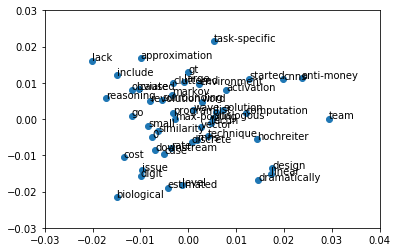

In [35]:
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
plt.axis([-0.03, 0.04, -0.03, 0.03])
 
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()